In [38]:
import matplotlib.pyplot as plt 
import random


In [9]:
def gen_U(n, C, a, m, Z_1):
    '''generates a vector of uniformly distribued numbers from <0,1> interval
    ------------------------------
    Parameters: 
    n- length of probe
    C,a,m,Z_1- constants, where
    n<<m
    ''' 
    Z = [Z_1]
    for i in range(1,n):
        z = (a*Z[i-1] + C)%m
        Z.append(z)
    U = [Z[i]/m for i in range(len(Z))]
    return U 
    

In [10]:
gen_U(10, 10, 7**5, 2**31, 1)

[4.656612873077393e-10,
 7.831025868654251e-06,
 0.13161605643108487,
 0.07106044190004468,
 0.3128470187075436,
 0.0198434223420918,
 0.508399308193475,
 0.6671728123910725,
 0.17345786141231656,
 0.3062767614610493]

In [11]:
u = gen_U(10000, 0, 7**5, 2**32, 1)

In [32]:
EU = sum(u)/10000

In [33]:
VarU = sum([(u[i] - EX)**2 for i in range(len(u))])/10000


In [35]:
print("Statistical tests: EU= {}, VarU= {}".format(EU, VarU))

Statistical tests: EU= 0.49518477127105, VarU= 0.08273256033169187


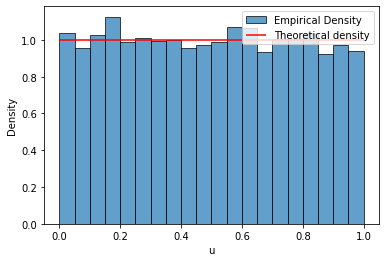

In [36]:
plt.hist(u, bins=20, density=True, alpha=0.7, edgecolor="k", label = "Empirical Density")
plt.hlines(y = 1 , xmin = 0, xmax = 1, color = "r", label ="Theoretical density")

plt.xlabel("u")
plt.ylabel("Density")
plt.legend()


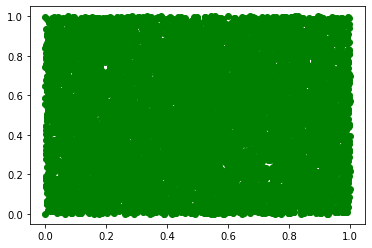

In [23]:
for i in range(len(u)):
    plt.scatter(u[i],u[i-1], color = "g")

Comparison between implemented generator and random.random() method

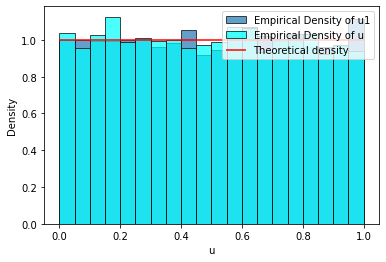

In [45]:
u1 = [random.random() for i in range(10000)]

plt.hist(u1, bins=20, density=True, alpha=0.7, edgecolor="k", label = "Empirical Density of u1")
plt.hist(u, bins=20, density=True, color="cyan", alpha=0.7, edgecolor="k", label = "Empirical Density of u")

plt.hlines(y = 1 , xmin = 0, xmax = 1, color = "r", label ="Theoretical density")

plt.xlabel("u")
plt.ylabel("Density")
plt.legend()


(array([955., 877., 865., 777., 763., 718., 649., 663., 605., 512., 469.,
        438., 359., 328., 282., 254., 211., 150.,  80.,  45.]),
 array([1.36104271e-05, 4.90704755e-02, 9.81273406e-02, 1.47184206e-01,
        1.96241071e-01, 2.45297936e-01, 2.94354801e-01, 3.43411666e-01,
        3.92468531e-01, 4.41525396e-01, 4.90582261e-01, 5.39639127e-01,
        5.88695992e-01, 6.37752857e-01, 6.86809722e-01, 7.35866587e-01,
        7.84923452e-01, 8.33980317e-01, 8.83037182e-01, 9.32094047e-01,
        9.81150912e-01]),
 <BarContainer object of 20 artists>)

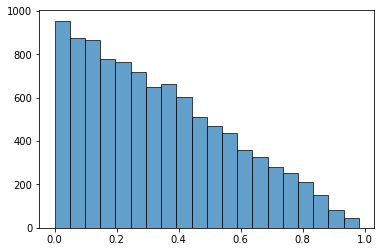

In [47]:
plt.hist([abs(u1[i] - u[i]) for i in range(len(u))], bins=20, alpha=0.7, edgecolor="k", label = "Differences between u1 and u")

This means that implemented algorithm is getting better for bigger probes.